In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df_gk_squad= pd.read_csv("Scrape_output/1995-1996-Premiership-Stats_gk_squad.csv")
df_squad= pd.read_csv("Scrape_output/1995-1996-Premiership-Stats_squad.csv")

In [79]:
df_gk_squad.head()

,Unnamed: 0,squad,games_starts,minutes,clean_sheets_perc,losses,wins,goals_against_per90,games_subs,keepers_used,minutes_per_game,goals_against,shots_on_target_against,save_perc,games,draws,clean_sheets
0,0,Arsenal,38,"3,420",42.1,9,17,0.84,0,1,90,32,157,0.796,38,12,16
1,1,Aston Villa,38,"3,420",34.2,11,19,0.92,2,2,86,35,153,0.771,40,8,13
2,2,Blackburn Rovers,38,"3,420",26.3,13,18,1.24,1,2,88,47,161,0.708,39,7,10
3,3,Bolton Wanderers,38,"3,420",10.5,25,8,1.87,0,3,90,71,216,0.671,38,5,4
4,4,Chelsea,38,"3,420",31.6,12,12,1.16,0,2,90,44,172,0.744,38,14,12


In [80]:
df_squad.head()

,Unnamed: 0,squad,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,goals,games,shots_on_target_perG,cards_yellow,shots_on_target,cards_red,goals_assists_pens_perG,pens_att
0,0,Arsenal,3,2.21,1.29,NaN,35,1.21,23,1.66,NaN,49,38,5.26,61,200,2,2.13,5
1,1,Aston Villa,2,2.26,1.29,NaN,37,1.24,22,1.26,NaN,49,38,4.55,46,173,2,2.21,2
2,2,Blackburn Rovers,3,2.76,1.58,NaN,45,1.50,25,1.97,NaN,60,38,5.79,70,220,5,2.68,3
3,3,Bolton Wanderers,3,1.74,1.03,NaN,27,0.95,23,1.74,NaN,39,38,4.37,64,166,2,1.66,3
4,4,Chelsea,3,2.08,1.18,NaN,34,1.11,22,2.00,NaN,45,38,4.58,74,174,2,2.00,4


In [81]:
df_gk_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
Unnamed: 0                 20 non-null int64
squad                      20 non-null object
games_starts               20 non-null int64
minutes                    20 non-null object
clean_sheets_perc          20 non-null float64
losses                     20 non-null int64
wins                       20 non-null int64
goals_against_per90        20 non-null float64
games_subs                 20 non-null int64
keepers_used               20 non-null int64
minutes_per_game           20 non-null int64
goals_against              20 non-null int64
shots_on_target_against    20 non-null int64
save_perc                  20 non-null float64
games                      20 non-null int64
draws                      20 non-null int64
clean_sheets               20 non-null int64
dtypes: float64(3), int64(12), object(2)
memory usage: 2.7+ KB


In [82]:
df_gk_squad = df_gk_squad.add_suffix("_gk")

In [83]:
df_gk_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
Unnamed: 0_gk                 20 non-null int64
squad_gk                      20 non-null object
games_starts_gk               20 non-null int64
minutes_gk                    20 non-null object
clean_sheets_perc_gk          20 non-null float64
losses_gk                     20 non-null int64
wins_gk                       20 non-null int64
goals_against_per90_gk        20 non-null float64
games_subs_gk                 20 non-null int64
keepers_used_gk               20 non-null int64
minutes_per_game_gk           20 non-null int64
goals_against_gk              20 non-null int64
shots_on_target_against_gk    20 non-null int64
save_perc_gk                  20 non-null float64
games_gk                      20 non-null int64
draws_gk                      20 non-null int64
clean_sheets_gk               20 non-null int64
dtypes: float64(3), int64(12), object(2)
memory usage: 2.7+ KB


In [84]:
df_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
Unnamed: 0                 20 non-null int64
squad                      20 non-null object
pens_made                  20 non-null int64
goals_assists_perG         20 non-null float64
goals_perG                 20 non-null float64
fouls                      0 non-null float64
assists                    20 non-null int64
goals_pens_perG            20 non-null float64
players_used               20 non-null int64
cards_perG                 20 non-null float64
fouls_perG                 0 non-null float64
goals                      20 non-null int64
games                      20 non-null int64
shots_on_target_perG       20 non-null float64
cards_yellow               20 non-null int64
shots_on_target            20 non-null int64
cards_red                  20 non-null int64
goals_assists_pens_perG    20 non-null float64
pens_att                   20 non-null int64
dtypes: float64(8), int64(1

In [100]:
df_year = df_squad.set_index('squad').join(df_gk_squad.set_index('squad_gk'))

In [101]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Arsenal to Wimbledon
Data columns (total 34 columns):
Unnamed: 0                    20 non-null int64
pens_made                     20 non-null int64
goals_assists_perG            20 non-null float64
goals_perG                    20 non-null float64
fouls                         0 non-null float64
assists                       20 non-null int64
goals_pens_perG               20 non-null float64
players_used                  20 non-null int64
cards_perG                    20 non-null float64
fouls_perG                    0 non-null float64
goals                         20 non-null int64
games                         20 non-null int64
shots_on_target_perG          20 non-null float64
cards_yellow                  20 non-null int64
shots_on_target               20 non-null int64
cards_red                     20 non-null int64
goals_assists_pens_perG       20 non-null float64
pens_att                      20 non-null int64
Unnamed: 0_

In [102]:
df_year.head()

,Unnamed: 0,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,...,goals_against_per90_gk,games_subs_gk,keepers_used_gk,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk
squad,,,,,,,,,,,,,,,,,,,,,
Arsenal,0,3,2.21,1.29,NaN,35,1.21,23,1.66,NaN,...,0.84,0,1,90,32,157,0.796,38,12,16
Aston Villa,1,2,2.26,1.29,NaN,37,1.24,22,1.26,NaN,...,0.92,2,2,86,35,153,0.771,40,8,13
Blackburn Rovers,2,3,2.76,1.58,NaN,45,1.50,25,1.97,NaN,...,1.24,1,2,88,47,161,0.708,39,7,10
Bolton Wanderers,3,3,1.74,1.03,NaN,27,0.95,23,1.74,NaN,...,1.87,0,3,90,71,216,0.671,38,5,4
Chelsea,4,3,2.08,1.18,NaN,34,1.11,22,2.00,NaN,...,1.16,0,2,90,44,172,0.744,38,14,12


In [103]:
df_year = df_year.drop("Unnamed: 0",axis=1)
df_year = df_year.drop("Unnamed: 0_gk",axis=1)

In [104]:
df_year.describe()

,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,goals,...,goals_against_per90_gk,games_subs_gk,keepers_used_gk,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk
count,20.000000,20.000000,20.00000,0.0,20.000000,20.000000,20.000000,20.00000,0.0,20.000000,...,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,2.650000,2.246000,1.27600,NaN,36.850000,1.202500,23.500000,1.57600,NaN,48.500000,...,1.302000,0.65000,2.150000,88.650000,49.450000,182.150000,0.73165,38.600000,9.750000,10.600000
std,1.268028,0.592962,0.31915,NaN,10.579399,0.307107,3.203616,0.32068,NaN,12.133035,...,0.311408,1.03999,1.136708,2.109502,11.878663,22.744056,0.03689,1.046297,2.769667,3.830625
min,0.000000,1.420000,0.87000,NaN,21.000000,0.760000,18.000000,0.82000,NaN,33.000000,...,0.840000,0.00000,1.000000,82.000000,32.000000,153.000000,0.67100,38.000000,5.000000,4.000000
25%,2.000000,1.815000,1.02250,NaN,28.750000,0.965000,21.750000,1.41750,NaN,38.750000,...,1.000000,0.00000,1.000000,88.000000,37.750000,163.250000,0.70700,38.000000,7.000000,8.000000
50%,3.000000,2.195000,1.25000,NaN,35.000000,1.170000,23.000000,1.64500,NaN,47.500000,...,1.340000,0.00000,2.000000,90.000000,51.000000,172.500000,0.72750,38.000000,10.000000,10.000000
75%,3.250000,2.527500,1.46000,NaN,40.500000,1.402500,25.250000,1.84750,NaN,55.500000,...,1.515000,1.00000,2.250000,90.000000,58.000000,203.500000,0.76825,39.000000,11.250000,13.000000
max,5.000000,3.530000,1.89000,NaN,62.000000,1.790000,29.000000,2.00000,NaN,72.000000,...,1.870000,4.00000,5.000000,90.000000,71.000000,222.000000,0.79600,42.000000,14.000000,18.000000


In [105]:
df_year["season"] = 1995

In [106]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Arsenal to Wimbledon
Data columns (total 33 columns):
pens_made                     20 non-null int64
goals_assists_perG            20 non-null float64
goals_perG                    20 non-null float64
fouls                         0 non-null float64
assists                       20 non-null int64
goals_pens_perG               20 non-null float64
players_used                  20 non-null int64
cards_perG                    20 non-null float64
fouls_perG                    0 non-null float64
goals                         20 non-null int64
games                         20 non-null int64
shots_on_target_perG          20 non-null float64
cards_yellow                  20 non-null int64
shots_on_target               20 non-null int64
cards_red                     20 non-null int64
goals_assists_pens_perG       20 non-null float64
pens_att                      20 non-null int64
games_starts_gk               20 non-null int64
minutes_gk 

In [107]:
df_year['minutes_gk'] = df_year['minutes_gk'].apply(lambda x:int(x.replace(',', '')))

In [108]:
df_year.head()

,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,goals,...,games_subs_gk,keepers_used_gk,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk,season
squad,,,,,,,,,,,,,,,,,,,,,
Arsenal,3,2.21,1.29,NaN,35,1.21,23,1.66,NaN,49,...,0,1,90,32,157,0.796,38,12,16,1995
Aston Villa,2,2.26,1.29,NaN,37,1.24,22,1.26,NaN,49,...,2,2,86,35,153,0.771,40,8,13,1995
Blackburn Rovers,3,2.76,1.58,NaN,45,1.50,25,1.97,NaN,60,...,1,2,88,47,161,0.708,39,7,10,1995
Bolton Wanderers,3,1.74,1.03,NaN,27,0.95,23,1.74,NaN,39,...,0,3,90,71,216,0.671,38,5,4,1995
Chelsea,3,2.08,1.18,NaN,34,1.11,22,2.00,NaN,45,...,0,2,90,44,172,0.744,38,14,12,1995


In [124]:
import glob
import re
path = './Scrape_output/'
files_gk = [f_gk for f_gk in glob.glob(path + "*Stats_gk_squad.csv")]
files = [f for f in glob.glob(path + "*Stats_squad.csv")]
df_full = pd.DataFrame()
df_off = pd.DataFrame()
df_gk = pd.DataFrame()
for f,f_gk in zip(files,files_gk):
    df_gk_squad_one = pd.read_csv(f_gk)
    df_squad_one = pd.read_csv(f)
    parts = re.split("/|-",f)
    df_gk_squad_one = df_gk_squad_one.add_suffix("_gk")
    df_gk_squad_one.rename(columns={'squad_gk':'squad'}, inplace=True)
    df_gk_squad_one['minutes_gk'] = df_gk_squad_one['minutes_gk'].apply(lambda x:int(x.replace(',', '')))
    df_squad_one = df_squad_one.drop("Unnamed: 0",axis=1)
    df_gk_squad_one = df_gk_squad_one.drop("Unnamed: 0_gk",axis=1) 
    df_squad_one["season"] = int(parts[2])
    print(int(parts[2]))
    df_one_year = pd.merge(df_squad_one,df_gk_squad_one,on=['squad'],how='outer',validate="one_to_one")
    df_one_year.info()
    df_gk_squad_one["season"] = int(parts[2])
    df_off = df_off.append(df_squad_one)
    df_gk = df_gk.append(df_gk_squad_one)
    df_full = df_full.append(df_one_year)
df_full.info()
df_gk.info()
df_off.info()

1995
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 34 columns):
squad                         25 non-null object
pens_made                     20 non-null float64
goals_assists_perG            20 non-null float64
goals_perG                    20 non-null float64
fouls                         0 non-null float64
assists                       20 non-null float64
goals_pens_perG               20 non-null float64
players_used                  20 non-null float64
cards_perG                    20 non-null float64
fouls_perG                    0 non-null float64
goals                         20 non-null float64
games                         20 non-null float64
shots_on_target_perG          20 non-null float64
cards_yellow                  20 non-null float64
shots_on_target               20 non-null float64
cards_red                     20 non-null float64
goals_assists_pens_perG       20 non-null float64
pens_att                      20 non-null flo

1994
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 34 columns):
squad                         24 non-null object
pens_made                     22 non-null float64
goals_assists_perG            22 non-null float64
goals_perG                    22 non-null float64
fouls                         0 non-null float64
assists                       22 non-null float64
goals_pens_perG               22 non-null float64
players_used                  22 non-null float64
cards_perG                    22 non-null float64
fouls_perG                    0 non-null float64
goals                         22 non-null float64
games                         22 non-null float64
shots_on_target_perG          22 non-null float64
cards_yellow                  22 non-null float64
shots_on_target               22 non-null float64
cards_red                     22 non-null float64
goals_assists_pens_perG       22 non-null float64
pens_att                      22 non-null flo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 34 columns):
squad                         32 non-null object
pens_made                     22 non-null float64
goals_assists_perG            22 non-null float64
goals_perG                    22 non-null float64
fouls                         0 non-null float64
assists                       22 non-null float64
goals_pens_perG               22 non-null float64
players_used                  22 non-null float64
cards_perG                    22 non-null float64
fouls_perG                    0 non-null float64
goals                         22 non-null float64
games                         22 non-null float64
shots_on_target_perG          22 non-null float64
cards_yellow                  22 non-null float64
shots_on_target               22 non-null float64
cards_red                     22 non-null float64
goals_assists_pens_perG       22 non-null float64
pens_att                      22 non-null float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 34 columns):
squad                         30 non-null object
pens_made                     20 non-null float64
goals_assists_perG            20 non-null float64
goals_perG                    20 non-null float64
fouls                         0 non-null float64
assists                       20 non-null float64
goals_pens_perG               20 non-null float64
players_used                  20 non-null float64
cards_perG                    20 non-null float64
fouls_perG                    0 non-null float64
goals                         20 non-null float64
games                         20 non-null float64
shots_on_target_perG          20 non-null float64
cards_yellow                  20 non-null float64
shots_on_target               20 non-null float64
cards_red                     20 non-null float64
goals_assists_pens_perG       20 non-null float64
pens_att                      20 non-null float64


In [125]:
df_full.head()

,squad,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,...,goals_against_per90_gk,games_subs_gk,keepers_used_gk,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk
0,Arsenal,3.0,2.21,1.29,NaN,35.0,1.21,23.0,1.66,NaN,...,1.13,1.0,2.0,88.0,43.0,126.0,0.659,39.0,7.0,10.0
1,Aston Villa,2.0,2.26,1.29,NaN,37.0,1.24,22.0,1.26,NaN,...,0.92,2.0,3.0,86.0,35.0,135.0,0.741,40.0,13.0,15.0
2,Blackburn Rovers,3.0,2.76,1.58,NaN,45.0,1.50,25.0,1.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolton Wanderers,3.0,1.74,1.03,NaN,27.0,0.95,23.0,1.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chelsea,3.0,2.08,1.18,NaN,34.0,1.11,22.0,2.00,NaN,...,0.89,0.0,2.0,90.0,34.0,132.0,0.742,38.0,11.0,17.0


In [128]:
df_full[df_full["season"] == 1995].head()

,squad,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,...,goals_against_per90_gk,games_subs_gk,keepers_used_gk,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk
0,Arsenal,3.0,2.21,1.29,NaN,35.0,1.21,23.0,1.66,NaN,...,1.13,1.0,2.0,88.0,43.0,126.0,0.659,39.0,7.0,10.0
1,Aston Villa,2.0,2.26,1.29,NaN,37.0,1.24,22.0,1.26,NaN,...,0.92,2.0,3.0,86.0,35.0,135.0,0.741,40.0,13.0,15.0
2,Blackburn Rovers,3.0,2.76,1.58,NaN,45.0,1.50,25.0,1.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolton Wanderers,3.0,1.74,1.03,NaN,27.0,0.95,23.0,1.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chelsea,3.0,2.08,1.18,NaN,34.0,1.11,22.0,2.00,NaN,...,0.89,0.0,2.0,90.0,34.0,132.0,0.742,38.0,11.0,17.0


In [27]:
df_gk_squad_full = df_gk_squad_full.drop("Unnamed: 0", axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [30]:
df_gk_squad_full['minutes'] = df_gk_squad_full['minutes'].apply(lambda x:int(x.replace(',', '')))

In [31]:
df_gk_squad_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 19
Data columns (total 17 columns):
squad                      526 non-null object
games_starts               526 non-null int64
minutes                    526 non-null int64
clean_sheets_perc          526 non-null float64
losses                     526 non-null int64
wins                       526 non-null int64
goals_against_per90        526 non-null float64
games_subs                 526 non-null int64
keepers_used               526 non-null int64
minutes_per_game           526 non-null int64
goals_against              526 non-null int64
shots_on_target_against    526 non-null int64
save_perc                  526 non-null float64
games                      526 non-null int64
draws                      526 non-null int64
clean_sheets               526 non-null int64
season                     526 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 94.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30267e10>,
      dtype=object)

<Figure size 864x360 with 0 Axes>

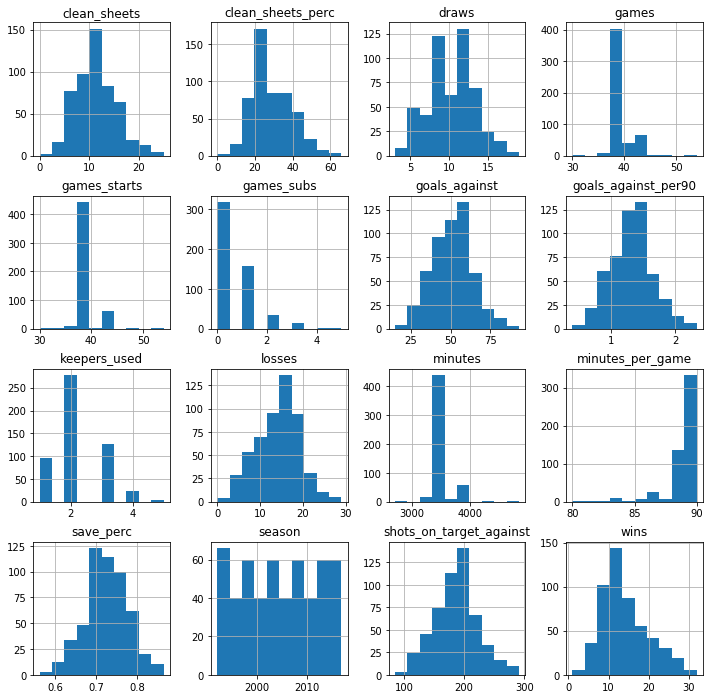

In [42]:
plt.figure(figsize=(12,5))
df_gk_squad_full.drop("squad",axis=1).hist(figsize=(12,12))

In [47]:
df_squad = df_squad.drop('Unnamed: 0',axis=1)
df_squad.columns

Index(['squad', 'pens_made', 'goals_assists_perG', 'goals_perG', 'fouls',
       'assists', 'goals_pens_perG', 'players_used', 'cards_perG',
       'fouls_perG', 'goals', 'games', 'shots_on_target_perG', 'cards_yellow',
       'shots_on_target', 'cards_red', 'goals_assists_pens_perG', 'pens_att'],
      dtype='object')

In [46]:
df_gk_squad.columns

Index(['squad', 'games_starts', 'minutes', 'clean_sheets_perc', 'losses',
       'wins', 'goals_against_per90', 'games_subs', 'keepers_used',
       'minutes_per_game', 'goals_against', 'shots_on_target_against',
       'save_perc', 'games', 'draws', 'clean_sheets', 'season'],
      dtype='object')

In [48]:
df_squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 18 columns):
squad                      22 non-null object
pens_made                  22 non-null int64
goals_assists_perG         22 non-null float64
goals_perG                 22 non-null float64
fouls                      0 non-null float64
assists                    22 non-null int64
goals_pens_perG            22 non-null float64
players_used               22 non-null int64
cards_perG                 22 non-null float64
fouls_perG                 0 non-null float64
goals                      22 non-null int64
games                      22 non-null int64
shots_on_target_perG       22 non-null float64
cards_yellow               22 non-null int64
shots_on_target            22 non-null int64
cards_red                  22 non-null int64
goals_assists_pens_perG    22 non-null float64
pens_att                   22 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 3.2+ KB


In [141]:
path = './Scrape_output/'
year = 1995
f_gk = glob.glob(path + "/{0}-{1}*Stats_gk_squad.csv".format(year,year+1))
f = glob.glob(path + "/{0}-{1}*Stats_squad.csv".format(year,year+1))
    
if len(f_gk) != 1:
    print("Invalid input, matching input Squad GK files:")
    print(f_gk)
if len(f) != 1:
    print("Invalid input, matching input Squad files:")
    print(f)
    
df_gk_squad= pd.read_csv(f_gk[0])
df_squad= pd.read_csv(f[0])
df_gk_squad = df_gk_squad.add_suffix("_gk")
df_year = df_squad.set_index('squad').join(df_gk_squad.set_index('squad_gk'))
df_year = df_year.drop("Unnamed: 0",axis=1)
df_year = df_year.drop("Unnamed: 0_gk",axis=1)
df_year["season"] = int(year)
df_year['minutes_gk'] = df_year['minutes_gk'].apply(lambda x:int(x.replace(',', '')))

output_name = "./Squad_{0}".format(year)
    
df_year.to_csv(output_name+".csv")

In [139]:
df = pd.read_csv(f[0])

In [140]:
df.head()

,Unnamed: 0,squad,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,goals,games,shots_on_target_perG,cards_yellow,shots_on_target,cards_red,goals_assists_pens_perG,pens_att
0,0,Arsenal,3,2.21,1.29,NaN,35,1.21,23,1.66,NaN,49,38,5.26,61,200,2,2.13,5
1,1,Aston Villa,2,2.26,1.29,NaN,37,1.24,22,1.26,NaN,49,38,4.55,46,173,2,2.21,2
2,2,Blackburn Rovers,3,2.76,1.58,NaN,45,1.50,25,1.97,NaN,60,38,5.79,70,220,5,2.68,3
3,3,Bolton Wanderers,3,1.74,1.03,NaN,27,0.95,23,1.74,NaN,39,38,4.37,64,166,2,1.66,3
4,4,Chelsea,3,2.08,1.18,NaN,34,1.11,22,2.00,NaN,45,38,4.58,74,174,2,2.00,4


In [39]:
df_92 = pd.read_csv("./Scrape_output/Squad_1992.csv")
print(len(df_92))
df_93 = pd.read_csv("./Scrape_output/Squad_1993.csv")
print(len(df_93))
df_94 = pd.read_csv("./Scrape_output/Squad_1994.csv")
print(len(df_94))
df_95 = pd.read_csv("./Scrape_output/Squad_1995.csv")
print(len(df_95))
df_96 = pd.read_csv("./Scrape_output/Squad_1996.csv")
print(len(df_96))
df_97 = pd.read_csv("./Scrape_output/Squad_1997.csv")
print(len(df_97))
df_98 = pd.read_csv("./Scrape_output/Squad_1998.csv")
print(len(df_98))
df_99 = pd.read_csv("./Scrape_output/Squad_1999.csv")
print(len(df_99))
df_00 = pd.read_csv("./Scrape_output/Squad_2000.csv")
print(len(df_00))
df_01 = pd.read_csv("./Scrape_output/Squad_2001.csv")
print(len(df_01))
df_02 = pd.read_csv("./Scrape_output/Squad_2002.csv")
print(len(df_02))
df_03 = pd.read_csv("./Scrape_output/Squad_2003.csv")
print(len(df_03))
df_04 = pd.read_csv("./Scrape_output/Squad_2004.csv")
print(len(df_04))
df_05 = pd.read_csv("./Scrape_output/Squad_2005.csv")
print(len(df_05))
df_06 = pd.read_csv("./Scrape_output/Squad_2006.csv")
print(len(df_06))
df_07 = pd.read_csv("./Scrape_output/Squad_2007.csv")
print(len(df_07))
df_08 = pd.read_csv("./Scrape_output/Squad_2008.csv")
print(len(df_08))
df_09 = pd.read_csv("./Scrape_output/Squad_2009.csv")
print(len(df_09))
df_10 = pd.read_csv("./Scrape_output/Squad_2010.csv")
print(len(df_10))
df_11 = pd.read_csv("./Scrape_output/Squad_2011.csv")
print(len(df_11))
df_12 = pd.read_csv("./Scrape_output/Squad_2012.csv")
print(len(df_12))
df_13 = pd.read_csv("./Scrape_output/Squad_2013.csv")
print(len(df_13))
df_14 = pd.read_csv("./Scrape_output/Squad_2014.csv")
print(len(df_14))
df_15 = pd.read_csv("./Scrape_output/Squad_2015.csv")
print(len(df_15))
df_16 = pd.read_csv("./Scrape_output/Squad_2016.csv")
print(len(df_16))
df_17 = pd.read_csv("./Scrape_output/Squad_2017.csv")
print(len(df_17))

22
22
22
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [27]:
df_both = df_92.append(df_93)

In [28]:
df_both = df_both.append(df_94)
df_both = df_both.append(df_95)
df_both = df_both.append(df_96)
df_both = df_both.append(df_97)
df_both = df_both.append(df_98)
df_both = df_both.append(df_99)
df_both = df_both.append(df_00)
df_both = df_both.append(df_01)
df_both = df_both.append(df_02)
df_both = df_both.append(df_03)
df_both = df_both.append(df_04)
df_both = df_both.append(df_05)
df_both = df_both.append(df_06)
df_both = df_both.append(df_07)
df_both = df_both.append(df_08)
df_both = df_both.append(df_09)
df_both = df_both.append(df_10)
df_both = df_both.append(df_11)
df_both = df_both.append(df_12)
df_both = df_both.append(df_13)
df_both = df_both.append(df_14)
df_both = df_both.append(df_15)
df_both = df_both.append(df_16)
df_both = df_both.append(df_17)

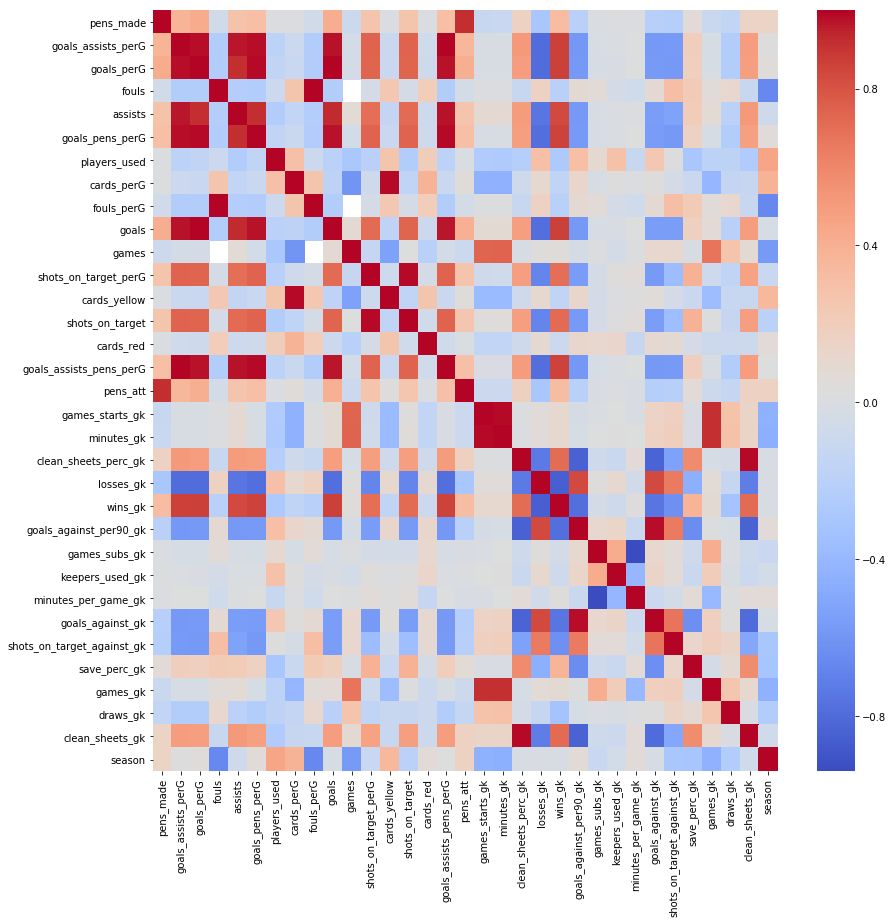

In [33]:
plt.figure(figsize=(14,14))
sns_corplot = sns.heatmap((df_both).corr(),cmap='coolwarm')

In [32]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 19
Data columns (total 34 columns):
squad                         526 non-null object
pens_made                     526 non-null int64
goals_assists_perG            526 non-null float64
goals_perG                    526 non-null float64
fouls                         380 non-null float64
assists                       526 non-null int64
goals_pens_perG               526 non-null float64
players_used                  526 non-null int64
cards_perG                    526 non-null float64
fouls_perG                    380 non-null float64
goals                         526 non-null int64
games                         526 non-null int64
shots_on_target_perG          526 non-null float64
cards_yellow                  526 non-null int64
shots_on_target               526 non-null int64
cards_red                     526 non-null int64
goals_assists_pens_perG       526 non-null float64
pens_att                      526 non-null int

In [35]:
fig = sns_corplot.get_figure()
fig.savefig("Correlations_Full_Squad.png")

In [36]:
df_both.to_csv("Full_Squad.csv")

# foul records start in 1999

### 19 seasons, 20 teams = 380 records

In [48]:
len(df_both[df_both['fouls'].notnull()]['season'].unique())

19

# Premiership until 2007, then Premier League

## Reduced from 22 to 20 in in 1995

#### 22 for 3 seasons, 20 for other 23 seasons = 526

In [41]:
len(df_both['squad'].unique())

49

In [42]:
df_both['squad'].unique()

array(['Arsenal', 'Aston Villa', 'Blackburn Rovers', 'Chelsea',
       'Coventry City', 'Crystal Palace', 'Everton', 'Ipswich Town',
       'Leeds United', 'Liverpool', 'Manchester City',
       'Manchester United', 'Middlesbrough', 'Norwich City',
       'Nottingham Forest', 'Oldham Athletic', 'Queens Park Rangers',
       'Sheffield United', 'Sheffield Wednesday', 'Southampton',
       'Tottenham Hotspur', 'Wimbledon', 'Newcastle United',
       'Swindon Town', 'West Ham United', 'Leicester City',
       'Bolton Wanderers', 'Derby County', 'Sunderland', 'Barnsley',
       'Charlton Athletic', 'Bradford City', 'Watford', 'Fulham',
       'Birmingham City', 'West Bromwich Albion', 'Portsmouth',
       'Wolverhampton Wanderers', 'Wigan Athletic', 'Reading',
       'Hull City', 'Stoke City', 'Burnley', 'Blackpool', 'Swansea City',
       'Cardiff City', 'Bournemouth', 'Brighton & Hove Albion',
       'Huddersfield Town'], dtype=object)

In [46]:
for team in df_both['squad'].unique():
    num_seasons = df_both[df_both['squad'] == team]['squad'].count()
    print(team+": {0}".format(num_seasons))

Arsenal: 26
Aston Villa: 24
Blackburn Rovers: 18
Chelsea: 26
Coventry City: 9
Crystal Palace: 9
Everton: 26
Ipswich Town: 5
Leeds United: 12
Liverpool: 26
Manchester City: 21
Manchester United: 26
Middlesbrough: 15
Norwich City: 8
Nottingham Forest: 5
Oldham Athletic: 2
Queens Park Rangers: 7
Sheffield United: 3
Sheffield Wednesday: 8
Southampton: 19
Tottenham Hotspur: 26
Wimbledon: 8
Newcastle United: 23
Swindon Town: 1
West Ham United: 22
Leicester City: 12
Bolton Wanderers: 13
Derby County: 7
Sunderland: 16
Barnsley: 1
Charlton Athletic: 8
Bradford City: 2
Watford: 5
Fulham: 13
Birmingham City: 7
West Bromwich Albion: 12
Portsmouth: 7
Wolverhampton Wanderers: 4
Wigan Athletic: 8
Reading: 3
Hull City: 5
Stoke City: 10
Burnley: 4
Blackpool: 1
Swansea City: 7
Cardiff City: 1
Bournemouth: 3
Brighton & Hove Albion: 1
Huddersfield Town: 1


In [49]:
df_both['Pts'] = df_both['wins_gk'].apply(lambda x:x*3) + df_both['draws_gk']

In [67]:
for year in df_both['season'].unique():
    one_season = df_both[df_both['season'] == year]
    winner = one_season[one_season['Pts'] == one_season['Pts'].max()]
    print(winner[['season','squad','Pts']])

    season              squad  Pts
11    1992  Manchester United   84
    season              squad  Pts
10    1993  Manchester United  105
   season             squad  Pts
2    1994  Blackburn Rovers   89
    season              squad  Pts
10    1995  Manchester United   82
    season              squad  Pts
10    1996  Manchester United   75
   season    squad  Pts
0    1997  Arsenal   78
    season              squad  Pts
11    1998  Manchester United   79
    season              squad  Pts
10    1999  Manchester United   91
    season              squad  Pts
13    2000  Manchester United   89
   season    squad  Pts
0    2001  Arsenal   87
    season              squad  Pts
12    2002  Manchester United   83
   season    squad  Pts
0    2003  Arsenal   90
   season    squad  Pts
6    2004  Chelsea   95
   season    squad  Pts
6    2005  Chelsea   91
    season              squad  Pts
10    2006  Manchester United   89
    season              squad  Pts
11    2007  Manchester United

 #### 2011 Man City and Man United tied on points

#### 2000 Pts = 89 while official is 80

#### 1993 Pts = 105 while official is 92

In [69]:
df_both['my_games'] = df_both['wins_gk'] + df_both['draws_gk'] + df_both['losses_gk']

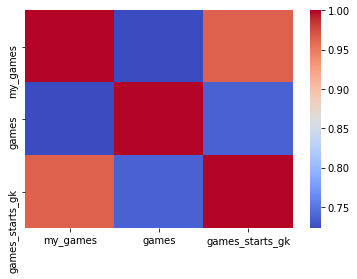

In [70]:

sns_corplot = sns.heatmap((
df_both[['my_games','games','games_starts_gk']]).corr(),cmap='coolwarm')

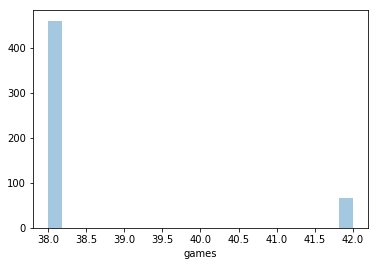

In [72]:
sns.distplot(df_both['games'],kde=False)

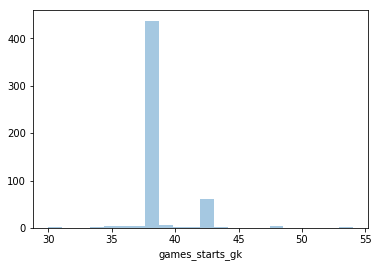

In [133]:
sns.distplot(df_both['games_starts_gk'],kde=False)

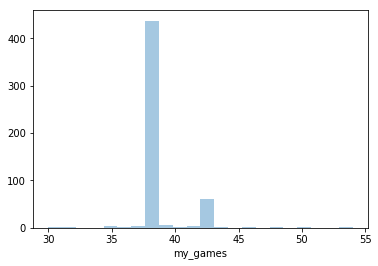

In [134]:
sns.distplot(df_both['my_games'],kde=False)

In [89]:
df_bad_WLD_totals = df_both[((df_both['games']-df_both['my_games']) != 0) | ((df_both['games_starts_gk']-df_both['my_games']) != 0) | ((df_both['games_starts_gk']-df_both['games']) != 0)]

In [98]:
len(df_bad_WLD_totals)/len(df_both)

0.07984790874524715

In [99]:
df_bad_WLD_totals[['season','squad','games','games_starts_gk','my_games','wins_gk','draws_gk','losses_gk']]

,season,squad,games,games_starts_gk,my_games,wins_gk,draws_gk,losses_gk
10,1992,Manchester City,42,42,44,15,13,16
18,1992,Sheffield Wednesday,42,42,43,15,15,13
2,1993,Blackburn Rovers,42,54,54,27,11,16
10,1993,Manchester United,42,48,50,31,12,7
11,1993,Newcastle United,42,42,43,24,8,11
13,1993,Oldham Athletic,42,36,36,7,12,17
15,1993,Sheffield United,42,42,35,8,18,9
17,1993,Southampton,42,30,30,10,5,15
18,1993,Swindon Town,42,40,41,5,15,21
14,1994,Norwich City,42,42,41,10,13,18


In [95]:
df_bad_gk_subs = df_both[(df_both['games_gk']-(df_both['games_starts_gk'] + df_both['games_subs_gk'])) != 0]

In [97]:
df_bad_gk_subs[['season','squad','games_gk','games_starts_gk','games_subs_gk']]

,season,squad,games_gk,games_starts_gk,games_subs_gk


In [100]:
df_bad_WLD_totals.to_csv("bad_WLD_totals_squad.csv")

In [103]:
df_bad_WLD_totals[df_bad_WLD_totals['games'] < df_bad_WLD_totals['my_games']][['season','squad','games','games_starts_gk','my_games','wins_gk','draws_gk','losses_gk']]

,season,squad,games,games_starts_gk,my_games,wins_gk,draws_gk,losses_gk
10,1992,Manchester City,42,42,44,15,13,16
18,1992,Sheffield Wednesday,42,42,43,15,15,13
2,1993,Blackburn Rovers,42,54,54,27,11,16
10,1993,Manchester United,42,48,50,31,12,7
11,1993,Newcastle United,42,42,43,24,8,11
7,1995,Leeds United,38,38,39,12,7,20
1,1996,Aston Villa,38,38,39,17,10,12
13,1996,Nottingham Forest,38,42,42,6,19,17
15,1996,Southampton,38,39,40,11,12,17
3,1997,Blackburn Rovers,38,48,46,18,11,17


In [105]:
df_both[df_both['pens_made']-df_both['pens_att'] > 0]

,squad,pens_made,goals_assists_perG,goals_perG,fouls,assists,goals_pens_perG,players_used,cards_perG,fouls_perG,...,minutes_per_game_gk,goals_against_gk,shots_on_target_against_gk,save_perc_gk,games_gk,draws_gk,clean_sheets_gk,season,Pts,my_games


In [120]:
df_both['my_clean_sheets_perc_gk'] = df_both['clean_sheets_gk']/df_both['games']*100

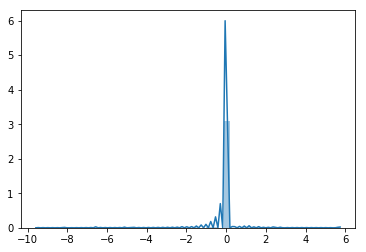

In [121]:
sns.distplot((df_both['clean_sheets_perc_gk'] - df_both['my_clean_sheets_perc_gk']))

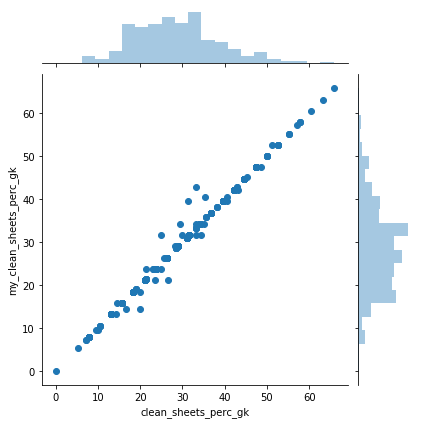

In [122]:
sns.jointplot(x = 'clean_sheets_perc_gk', y = 'my_clean_sheets_perc_gk',data=df_both)

In [123]:
df_both['my_clean_sheets_perc_gk'] = df_both['clean_sheets_gk']/df_both['my_games']*100

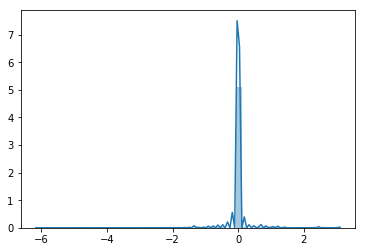

In [124]:
sns.distplot((df_both['clean_sheets_perc_gk'] - df_both['my_clean_sheets_perc_gk']))

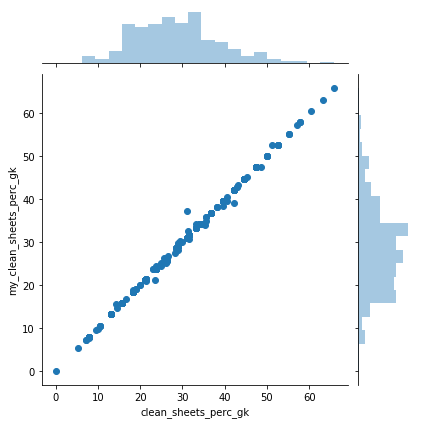

In [125]:
sns.jointplot(x = 'clean_sheets_perc_gk', y = 'my_clean_sheets_perc_gk',data=df_both)

In [127]:
df_both['my_clean_sheets_perc_gk'] = df_both['clean_sheets_gk']/df_both['games_starts_gk']*100

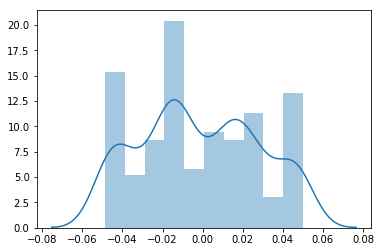

In [128]:
sns.distplot((df_both['clean_sheets_perc_gk'] - df_both['my_clean_sheets_perc_gk']))

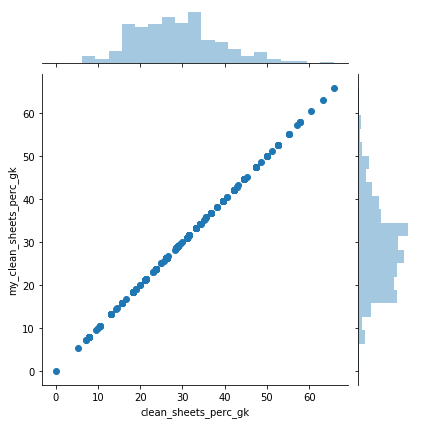

In [129]:
sns.jointplot(x = 'clean_sheets_perc_gk', y = 'my_clean_sheets_perc_gk',data=df_both)

In [130]:
df_both['my_goals_against_per90_gk'] = df_both['goals_against_gk']/df_both['minutes_gk']*90

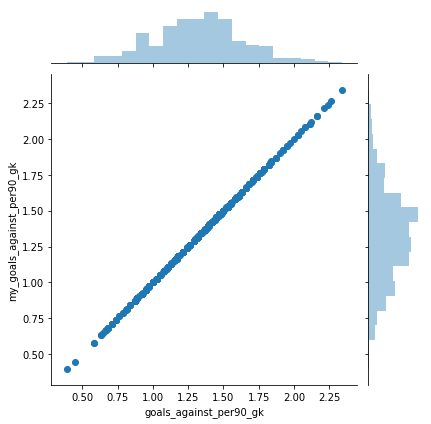

In [131]:
sns.jointplot(x = 'goals_against_per90_gk', y = 'my_goals_against_per90_gk',data=df_both)

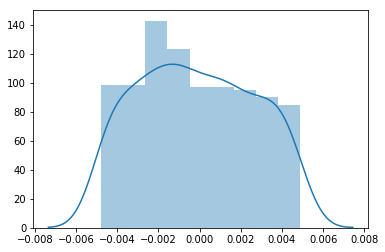

In [132]:
sns.distplot((df_both['goals_against_per90_gk'] - df_both['my_goals_against_per90_gk']))

In [139]:
df_both['my_minutes_per_game_gk'] = df_both['minutes_gk']/df_both['games_gk']

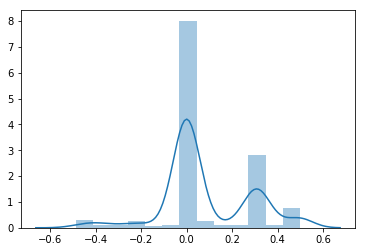

In [136]:
sns.distplot((df_both['minutes_per_game_gk'] - df_both['my_minutes_per_game_gk']))

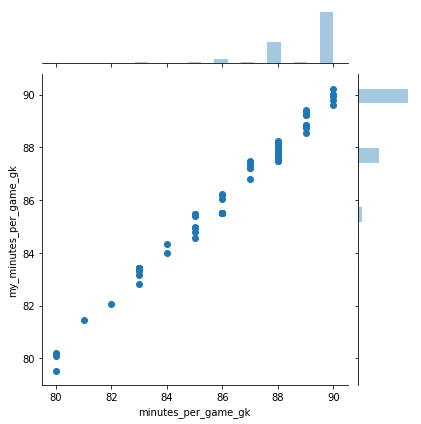

In [137]:
sns.jointplot(x = 'minutes_per_game_gk', y = 'my_minutes_per_game_gk',data=df_both)

In [153]:
import math
df_both['my_minutes_per_game_int_gk'] = df_both['my_minutes_per_game_gk'].apply(lambda x:math.floor(x))

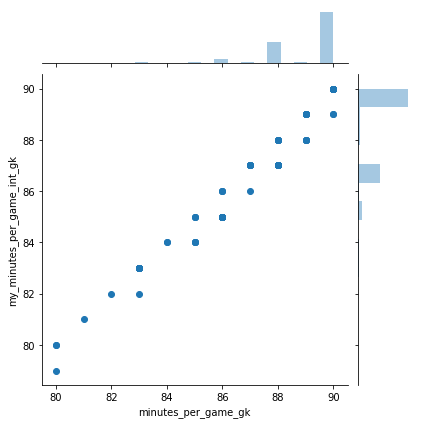

In [154]:
sns.jointplot(x = 'minutes_per_game_gk', y = 'my_minutes_per_game_int_gk',data=df_both)

In [156]:
df_both['my_save_perc_gk'] = (df_both['shots_on_target_against_gk'] - df_both['goals_against_gk'])/df_both['shots_on_target_against_gk']

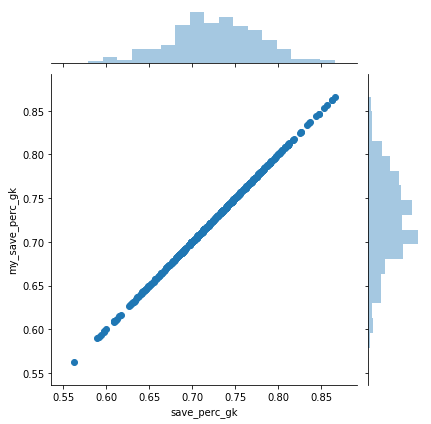

In [157]:
sns.jointplot(x = 'save_perc_gk', y = 'my_save_perc_gk',data=df_both)

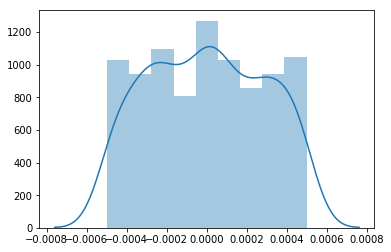

In [158]:
sns.distplot((df_both['save_perc_gk'] - df_both['my_save_perc_gk']))

In [165]:
for year in df_both['season'].unique():
    one_season = df_both[df_both['season'] == year]
    SoI = one_season['shots_on_target'].sum()
    SoIa = one_season['shots_on_target_against_gk'].sum()
    print("{0}: SoI: {1} SoIa: {2} %Diff: {3:.2f}".format(year,SoI,SoIa,(SoIa - SoI)/SoIa))

1992: SoI: 4285 SoIa: 4264 %Diff: -0.00
1993: SoI: 4294 SoIa: 4294 %Diff: 0.00
1994: SoI: 4113 SoIa: 4432 %Diff: 0.07
1995: SoI: 3713 SoIa: 3643 %Diff: -0.02
1996: SoI: 4135 SoIa: 3995 %Diff: -0.04
1997: SoI: 4035 SoIa: 3782 %Diff: -0.07
1998: SoI: 3732 SoIa: 3879 %Diff: 0.04
1999: SoI: 3785 SoIa: 3752 %Diff: -0.01
2000: SoI: 3871 SoIa: 3665 %Diff: -0.06
2001: SoI: 4360 SoIa: 4290 %Diff: -0.02
2002: SoI: 3663 SoIa: 3632 %Diff: -0.01
2003: SoI: 3626 SoIa: 3696 %Diff: 0.02
2004: SoI: 4399 SoIa: 4199 %Diff: -0.05
2005: SoI: 4237 SoIa: 4091 %Diff: -0.04
2006: SoI: 4000 SoIa: 4378 %Diff: 0.09
2007: SoI: 3932 SoIa: 3992 %Diff: 0.02
2008: SoI: 3824 SoIa: 3672 %Diff: -0.04
2009: SoI: 3597 SoIa: 3682 %Diff: 0.02
2010: SoI: 3606 SoIa: 3682 %Diff: 0.02
2011: SoI: 3629 SoIa: 3632 %Diff: 0.00
2012: SoI: 4338 SoIa: 3454 %Diff: -0.26
2013: SoI: 3671 SoIa: 3360 %Diff: -0.09
2014: SoI: 3181 SoIa: 3122 %Diff: -0.02
2015: SoI: 3257 SoIa: 3111 %Diff: -0.05
2016: SoI: 3284 SoIa: 3282 %Diff: -0.00
2017: SoI

In [166]:
df_both['shots_on_target'].sum()

99775

In [167]:
df_both['shots_on_target_against_gk'].sum()

98157

In [168]:
(df_both['shots_on_target_against_gk'].sum() - df_both['shots_on_target'].sum())/df_both['shots_on_target_against_gk'].sum()

-0.016483796367044633

In [169]:
df_both['my_goals_perG'] = df_both['goals']/df_both['games']

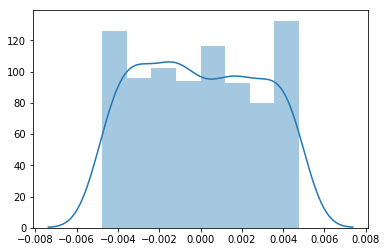

In [170]:
sns.distplot((df_both['goals_perG'] - df_both['my_goals_perG']))

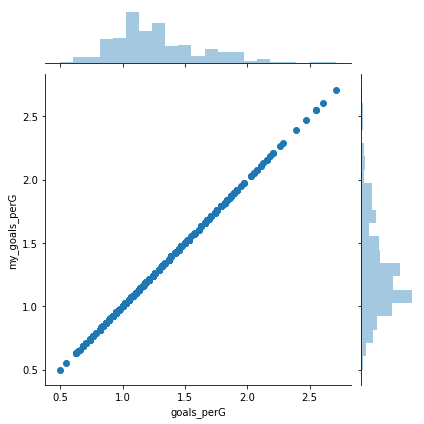

In [171]:
sns.jointplot(x = 'goals_perG', y = 'my_goals_perG',data=df_both)

In [172]:
df_both['my_goals_assists_perG'] = (df_both['goals'] + df_both['assists'])/df_both['games']

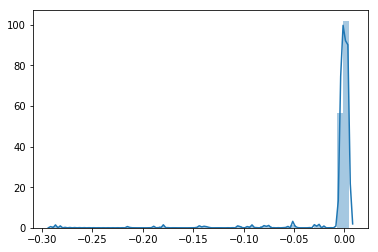

In [173]:
sns.distplot((df_both['goals_assists_perG'] - df_both['my_goals_assists_perG']))

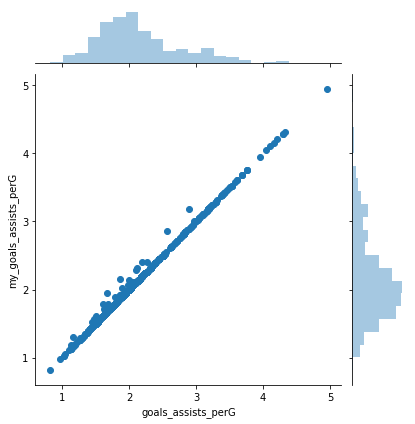

In [174]:
sns.jointplot(x = 'goals_assists_perG', y = 'my_goals_assists_perG',data=df_both)

In [175]:
df_both[['goals_assists_perG','my_goals_assists_perG']].head()

,goals_assists_perG,my_goals_assists_perG
0,1.76,1.761905
1,2.31,2.309524
2,2.81,2.809524
3,2.14,2.142857
4,1.69,1.785714


In [177]:
df_both['my_goals_assists_perG'] = df_both['my_goals_assists_perG'].apply(lambda x: int(x*100)/100)

In [179]:
df_both[['goals_assists_perG','my_goals_assists_perG']].head()

,goals_assists_perG,my_goals_assists_perG
0,1.76,1.76
1,2.31,2.30
2,2.81,2.80
3,2.14,2.14
4,1.69,1.78


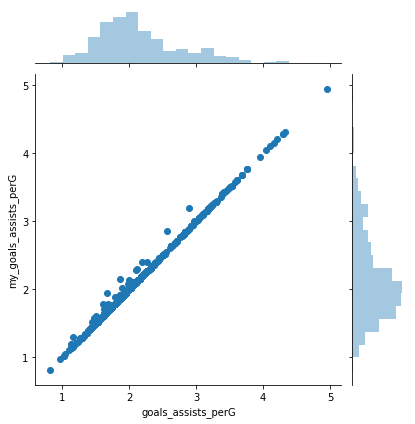

In [180]:
sns.jointplot(x = 'goals_assists_perG', y = 'my_goals_assists_perG',data=df_both)

In [189]:
df_both['my_goals_pens_perG'] = (df_both['goals'] - df_both['pens_made'])/df_both['games']

In [190]:
df_both['my_goals_pens_perG'] = df_both['my_goals_pens_perG'].apply(lambda x: int(x*100)/100)

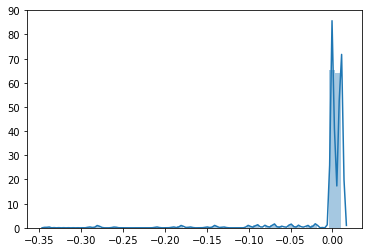

In [191]:
sns.distplot((df_both['goals_pens_perG'] - df_both['my_goals_pens_perG']))

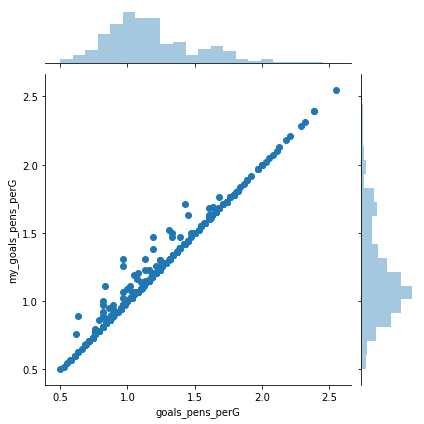

In [192]:
sns.jointplot(x = 'goals_pens_perG', y = 'my_goals_pens_perG',data=df_both)

In [193]:
df_both[['goals_pens_perG','my_goals_pens_perG']].head()

,goals_pens_perG,my_goals_pens_perG
0,0.95,0.95
1,1.29,1.28
2,1.50,1.50
3,1.17,1.16
4,1.00,1.09


In [247]:
df_both['diff_goals_pens'] = (df_both['goals_pens_perG'] - df_both['my_goals_pens_perG'])/df_both['goals_pens_perG']

In [248]:
df_both['diff_goals_assists'] = (df_both['goals_assists_perG'] - df_both['my_goals_assists_perG'])/df_both['goals_assists_perG']

In [263]:
df_both[(df_both['diff_goals_assists'].apply(lambda x: abs(x)) > 0.0101) | (df_both['diff_goals_pens'].apply(lambda x: abs(x)) > 0.0101)]['diff_goals_assists'].apply(lambda x: abs(x)).max()

0.16766467065868265

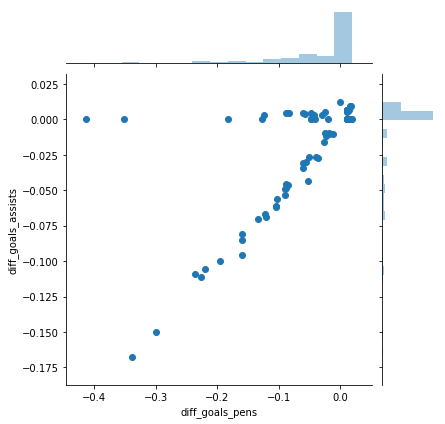

In [264]:
sns.jointplot(x = 'diff_goals_pens', y = 'diff_goals_assists',data=df_both[(df_both['diff_goals_assists'].apply(lambda x: abs(x)) > 0.0101) | (df_both['diff_goals_pens'].apply(lambda x: abs(x)) > 0.0101)])

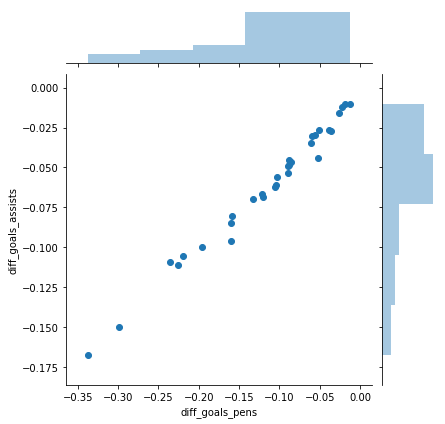

In [251]:
sns.jointplot(x = 'diff_goals_pens', y = 'diff_goals_assists',data=df_both[(df_both['diff_goals_assists'].apply(lambda x: abs(x)) > 0.0101) & (df_both['diff_goals_pens'].apply(lambda x: abs(x)) > 0.0101)])

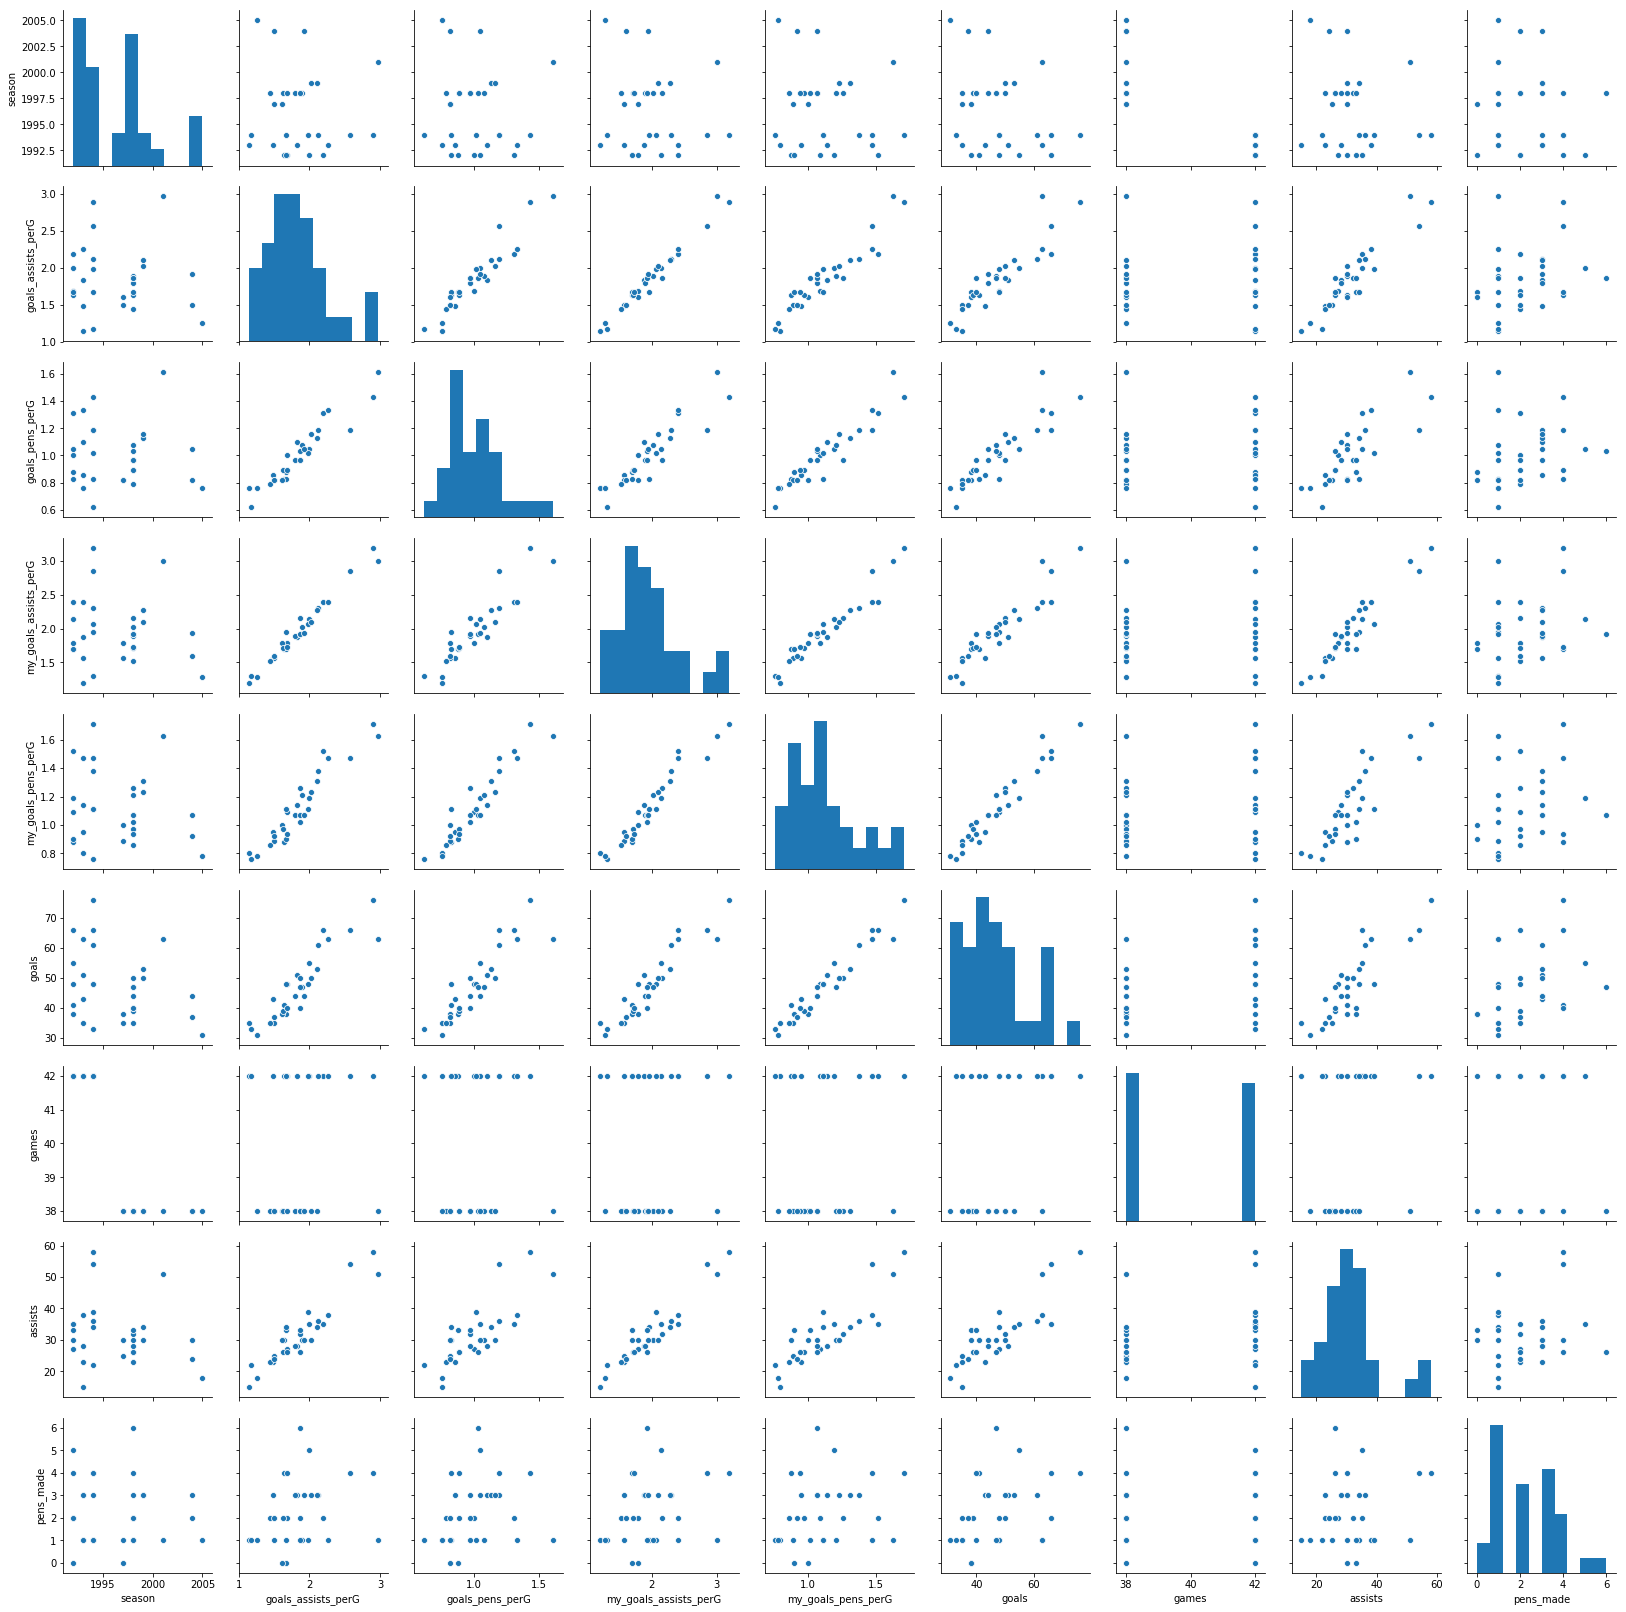

In [252]:
sns.pairplot(df_both[(df_both['diff_goals_assists'].apply(lambda x: abs(x)) > 0.0101) & (df_both['diff_goals_pens'].apply(lambda x: abs(x)) > 0.0101)][['season','squad','goals_assists_perG','goals_pens_perG','my_goals_assists_perG','my_goals_pens_perG','goals','games','assists','pens_made']])

In [253]:
df_both['my_goals_assists_pens_perG'] = (df_both['goals'] +df_both['assists']- df_both['pens_made'])/df_both['games']

In [254]:
df_both['my_goals_assists_pens_perG'] = df_both['my_goals_assists_pens_perG'].apply(lambda x: int(x*100)/100)

In [255]:
df_both['diff_goals_assists_pens'] = (df_both['goals_assists_pens_perG'] - df_both['my_goals_assists_pens_perG'])/df_both['goals_assists_pens_perG']

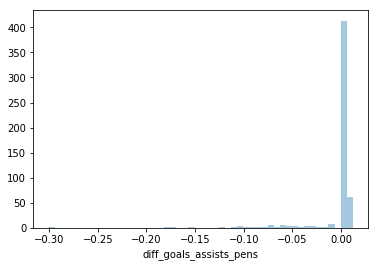

In [256]:
sns.distplot(df_both['diff_goals_assists_pens'],kde=False)

In [257]:
df_both[['goals_assists_pens_perG','my_goals_assists_pens_perG']].head()

,goals_assists_pens_perG,my_goals_assists_pens_perG
0,1.76,1.76
1,2.26,2.26
2,2.74,2.73
3,2.12,2.11
4,1.64,1.73


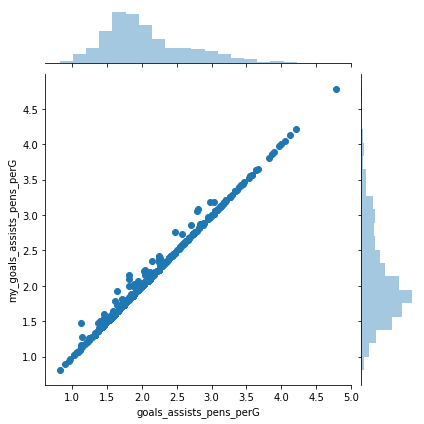

In [258]:
sns.jointplot(x = 'goals_assists_pens_perG', y = 'my_goals_assists_pens_perG',data=df_both)

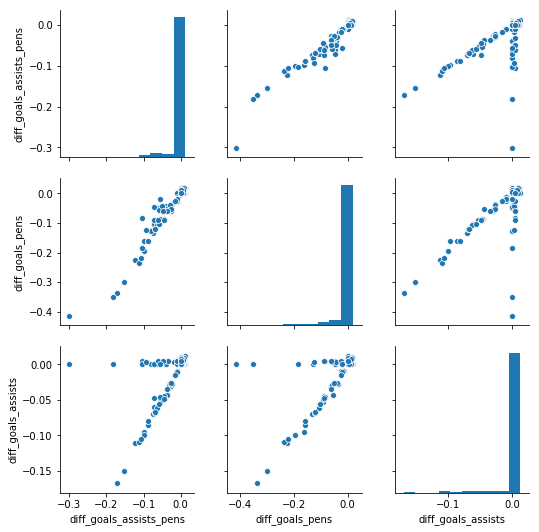

In [259]:
sns.pairplot(df_both[['diff_goals_assists_pens','diff_goals_pens','diff_goals_assists']])

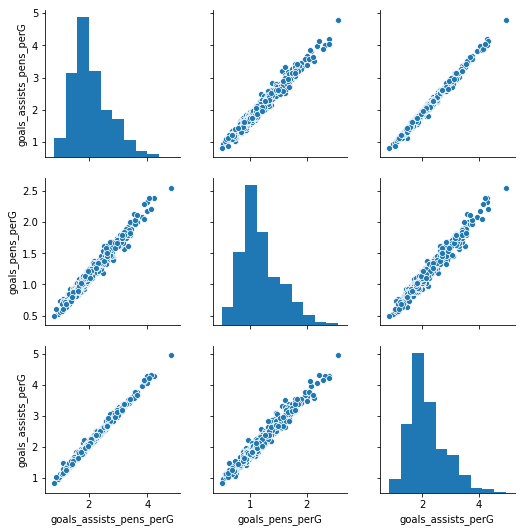

In [260]:
sns.pairplot(df_both[['goals_assists_pens_perG','goals_pens_perG','goals_assists_perG']])

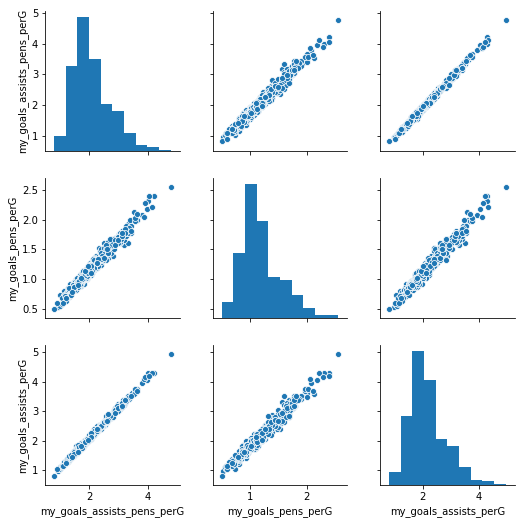

In [261]:
sns.pairplot(df_both[['my_goals_assists_pens_perG','my_goals_pens_perG','my_goals_assists_perG']])

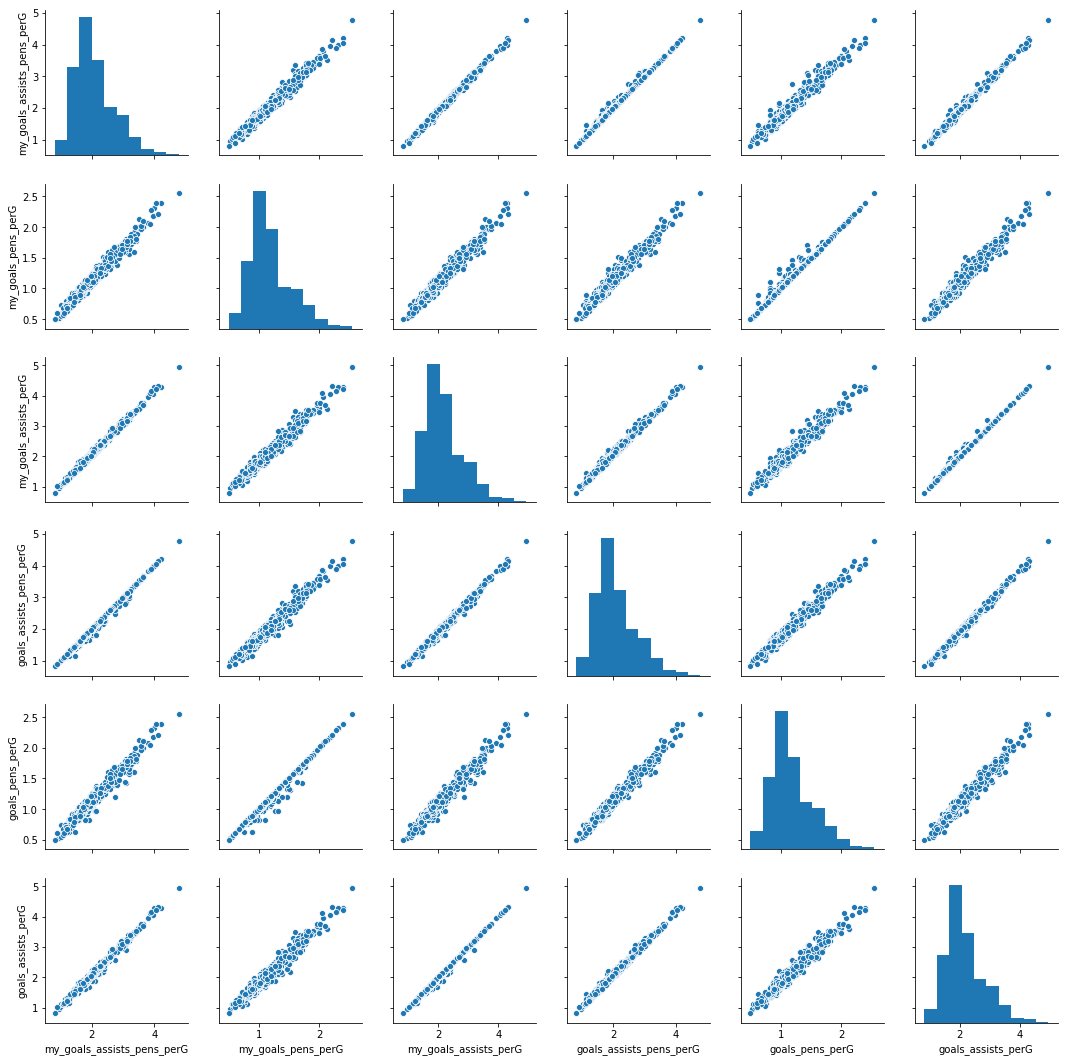

In [262]:
sns.pairplot(df_both[['my_goals_assists_pens_perG','my_goals_pens_perG','my_goals_assists_perG','goals_assists_pens_perG','goals_pens_perG','goals_assists_perG']])

In [268]:
df_both['my_goals_pens_2_perG'] = df_both['goals_perG'] - (df_both['pens_made']/df_both['games']).apply(lambda x: int(x*100)/100)

In [271]:
df_both['my_goals_pens_2_perG'] = df_both['my_goals_pens_2_perG'].apply(lambda x: int(x*100)/100)

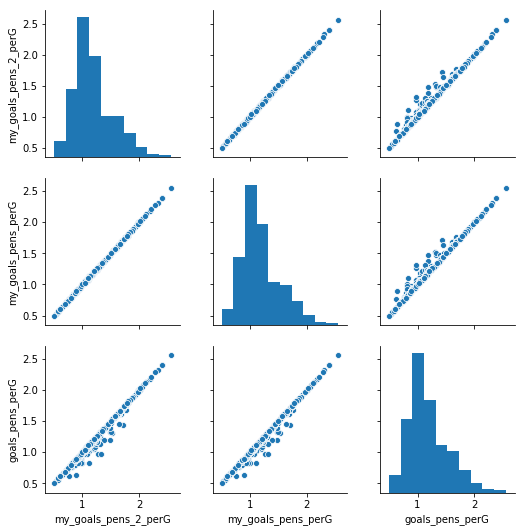

In [272]:
sns.pairplot(df_both[['my_goals_pens_2_perG','my_goals_pens_perG','goals_pens_perG']])

In [273]:
df_both['my_shots_on_target_perG'] = df_both['shots_on_target']/df_both['games']

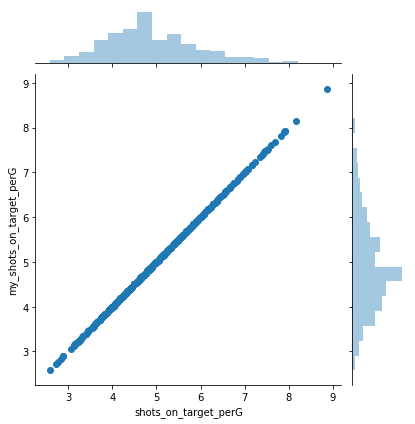

In [274]:
sns.jointplot(x = 'shots_on_target_perG', y = 'my_shots_on_target_perG',data=df_both)

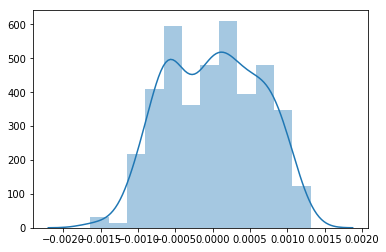

In [276]:
sns.distplot((df_both['shots_on_target_perG'] - df_both['my_shots_on_target_perG'])/df_both['shots_on_target_perG'])

In [284]:
df_both['my_fouls_perG'] = df_both['fouls']/df_both['games']
df_from99 = df_both[df_both['season'] > 1999]

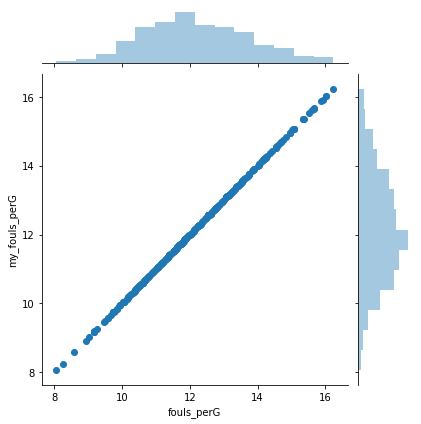

In [285]:
sns.jointplot(x = 'fouls_perG', y = 'my_fouls_perG',data=df_from99)

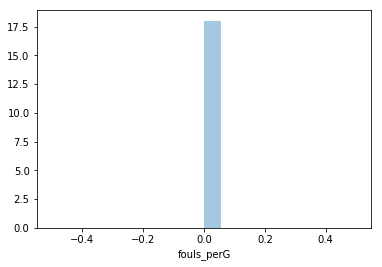

In [287]:
sns.distplot((df_from99['fouls_perG'] - df_from99['fouls_perG']))

In [288]:
df_both['my_cards_perG'] = (df_both['cards_yellow']+df_both['cards_red'])/df_both['games']

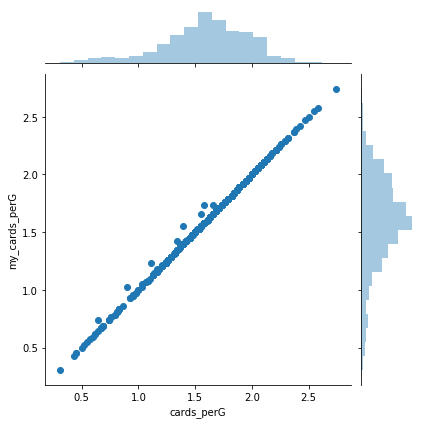

In [290]:
sns.jointplot(x = 'cards_perG', y = 'my_cards_perG',data=df_both)